=== SINGAPORE-LONDON CONVERGENCE ANALYSIS ===

Loaded 2000 data: 315 cities
Loaded 2012 data: 525 cities in GNC, 525 cities in SVM
Loaded 2016 data: 707 cities in GNC, 707 cities in SVM
Loaded 2018 data: 708 cities in GNC, 708 cities in SVM
Loaded 2020 data: 707 cities in GNC, 707 cities in SVM

1. BOOTSTRAP CONVERGENCE ANALYSIS
Mean Convergence: 0.687
95% CI: [0.654, 0.723]

Year-by-year convergence:
  2000: 0.645 (40891 / 63354)
  2012: 0.673 (83064 / 123464)
  2016: 0.754 (85654 / 113607)
  2018: 0.709 (72652 / 102540)
  2020: 0.654 (74080 / 113344)

2. SECTORAL CONVERGENCE ANALYSIS

2000 Sectoral Convergence:
  accountancy: 0.600 (S:6, L:10, Firms: 3/18)
  advertising: 0.654 (S:17, L:26, Firms: 7/15)
  banking: 0.778 (S:14, L:18, Firms: 5/23)
  insurance: 0.471 (S:8, L:17, Firms: 4/11)
  law: 0.267 (S:4, L:15, Firms: 4/16)
  management: 0.923 (S:12, L:13, Firms: 5/17)

2012 Sectoral Convergence:
  accountancy: 0.608 (S:62, L:102, Firms: 23/25)
  advertising: 0.825 (S:66, L:80, Firm

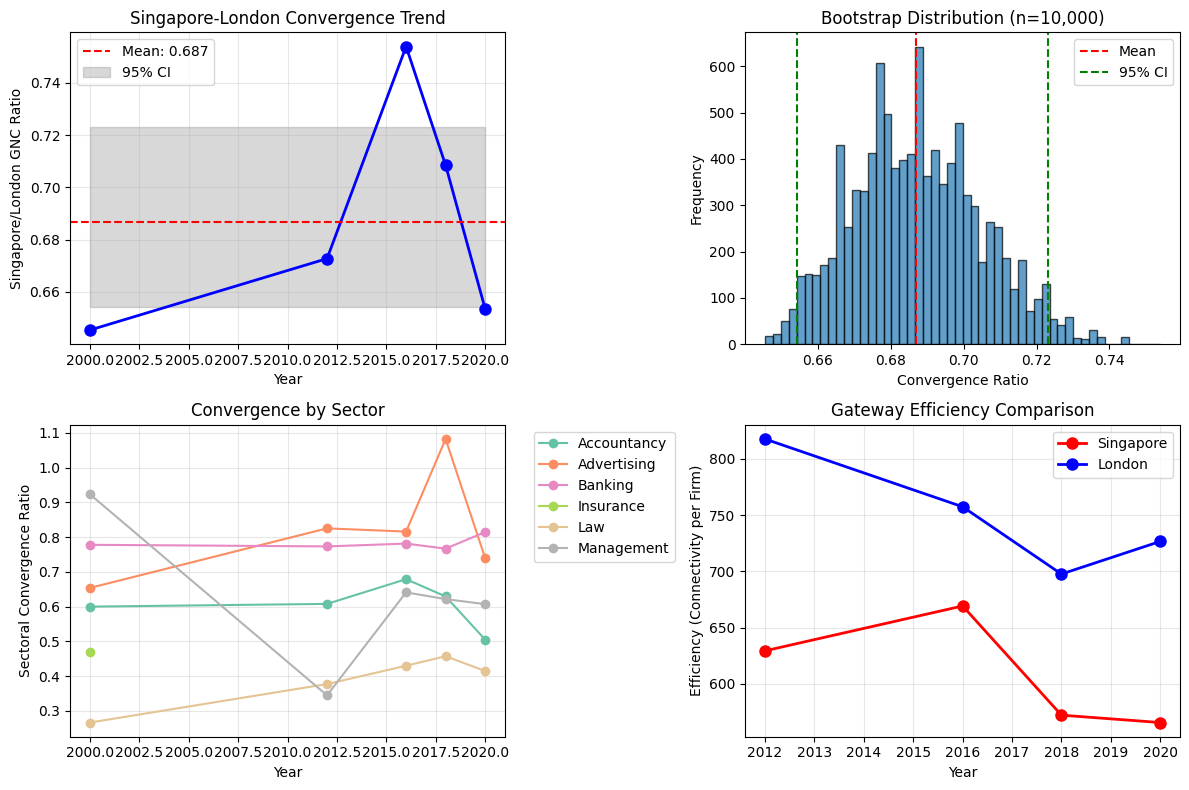


4. CRISIS RESILIENCE ANALYSIS

Singapore:
  Financial Crisis (2000-2012): 1.031
  COVID-19 (2018-2020): 0.020

London:
  Financial Crisis (2000-2012): 0.949
  COVID-19 (2018-2020): 0.105

5. NETWORK CENTRALITY EVOLUTION

Betweenness Centrality:
  2000: Singapore=0.0000, London=0.0000
  2012: Singapore=0.0000, London=0.0010
  2016: Singapore=0.0001, London=0.0056
  2018: Singapore=0.0001, London=0.0013
  2020: Singapore=0.0003, London=0.0001


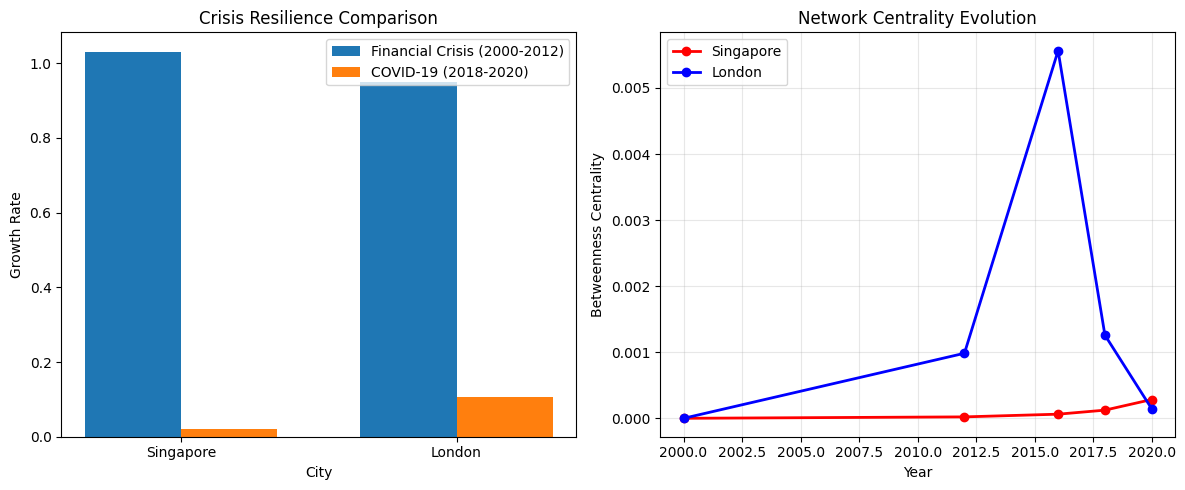


6. STATISTICAL SIGNIFICANCE
Convergence Trend Slope: 0.0052
P-value: 0.793


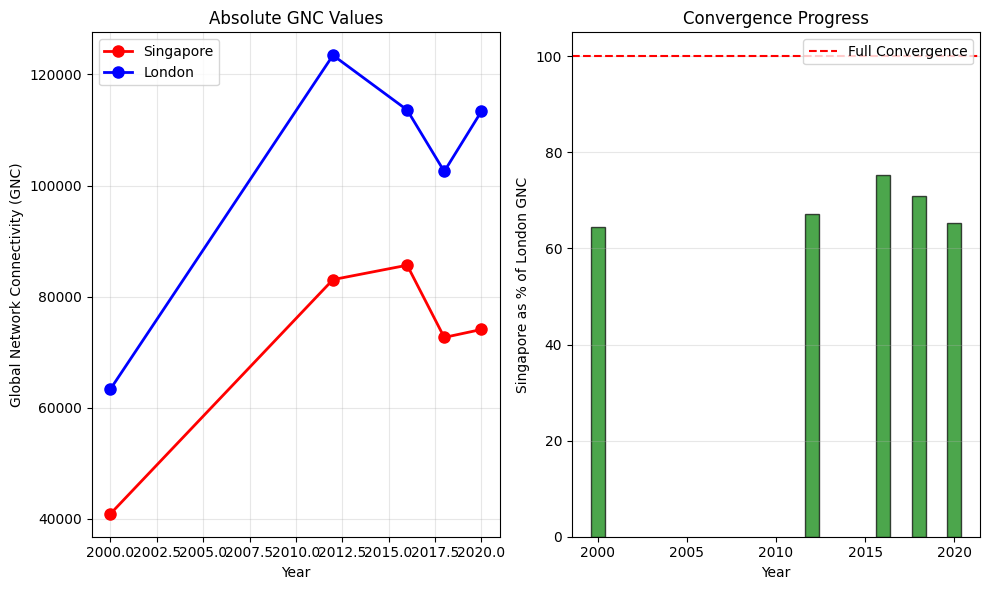

Loaded 2000 data: 315 cities
Loaded 2012 data: 525 cities in GNC, 525 cities in SVM
Loaded 2016 data: 707 cities in GNC, 707 cities in SVM
Loaded 2018 data: 708 cities in GNC, 708 cities in SVM
Loaded 2020 data: 707 cities in GNC, 707 cities in SVM

=== FIRM COVERAGE ANALYSIS ===

2000 Firm Coverage:
  accountancy: 3/18 (16.7%)
  advertising: 7/15 (46.7%)
  banking: 5/23 (21.7%)
  insurance: 4/11 (36.4%)
  law: 4/16 (25.0%)
  management: 5/17 (29.4%)
  OVERALL: 28/100 (28.0%)

2012 Firm Coverage:
  accountancy: 23/25 (92.0%)
  advertising: 25/25 (100.0%)
  banking: 75/75 (100.0%)
  law: 25/25 (100.0%)
  management: 25/25 (100.0%)
  OVERALL: 173/175 (98.9%)

2016 Firm Coverage:
  accountancy: 25/25 (100.0%)
  advertising: 24/25 (96.0%)
  banking: 73/75 (97.3%)
  law: 25/25 (100.0%)
  management: 23/25 (92.0%)
  OVERALL: 170/175 (97.1%)

2018 Firm Coverage:
  accountancy: 25/25 (100.0%)
  advertising: 23/25 (92.0%)
  banking: 74/75 (98.7%)
  law: 25/25 (100.0%)
  management: 22/25 (88.0%

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

# For Google Colab - mount drive if needed
# from google.colab import drive
# drive.mount('/content/drive')

class GAWCDataLoader:
    def __init__(self):
        self.years = [2000, 2012, 2016, 2018, 2020]
        self.gnc_data = {}
        self.svm_data = {}
        self.file_mapping = {
            2000: {'gnc': 'da11_gnc_2000.csv', 'svm': 'da11_svm_2000.csv'},
            2012: {'gnc': 'da27_gnc2012.xlsx', 'svm': 'da27_svm2012.xlsx'},
            2016: {'gnc': 'da28_gnc2016.xlsx', 'svm': 'da28_svm2016.xlsx'},
            2018: {'gnc': 'da30_gnc2018.xlsx', 'svm': 'da30_svm2018.xlsx'},
            2020: {'gnc': 'da31_gnc2020.xlsx', 'svm': 'da31_svm2020.xlsx'}
        }

        # Complete firm lists for all years
        self.firms_by_year = {
            2000: self._get_2000_firms(),
            2012: self._get_2012_firms(),
            2016: self._get_2016_firms(),
            2018: self._get_2018_firms(),
            2020: self._get_2020_firms()
        }

    def _get_2000_firms(self):
        """Complete firm list for 2000"""
        return {
            'accountancy': [
                'Ernst & Young', 'Arthur Andersen', 'Macintyre Sträter International (MSI)',
                'IGAF: International Group of Accounting Firms', 'AGN International',
                'BDO International', 'Grant Thornton International', 'Horwath International',
                'KPMG', 'Summit International + Baker Tilly', 'RSM International',
                'Moores Rowland International', 'HLB International',
                'Moore Stephens International Network', 'Nexia International',
                'PKF International', 'Fiducial International', 'PricewaterhouseCoopers'
            ],
            'advertising': [
                'Impiric', 'TMP Worldwide', 'Hakuhodo Inc.', 'Draft Worldwide',
                'Young & Rubicam Inc.', "D'Arcy Masius Benton & Bowles", 'FCB',
                'Saatchi & Saatchi', 'Ogilvy & Mather Worldwide Inc.', 'BBDO Worldwide',
                'McCann-Erickson WorldGroup', 'J Walter Thompson', 'Euro RSCG',
                'CMG. Carlson Marketing Group', 'Asatsu DK'
            ],
            'banking': [
                'WestLB (Westdeutsche Landesbank Girozentrale)', 'Dresdner Bank',
                'Commerzbank', 'Deutsche Bank', 'Chase Hambrecht & Quist', 'BNP Paribas',
                'ABN-AMRO Holding NV', 'Credit Suisse First Boston', 'Rabobank International',
                'UBS AG', 'ING Bank', 'Barclays', 'Fuji Bank', 'Bayerische HypoVereinsbank',
                'Bayerische Landesbank Girozentrale', 'SDI (Sakura+Dellsher Bank)',
                'Sumitomo Bank', 'Sanwa', 'J. P. Morgan', 'Bank of Tokyo-Mitsubishi',
                'Dai-Ichi Kangyo Bank', 'HSBC', 'CitiGroup (Citibank + SSBCiti Asset Management)'
            ],
            'insurance': [
                'Allianz Group', 'Skandia Group', 'Chubb Group', 'Prudential',
                'Reliance Group Holdings', 'Winterthur', 'Fortis', 'CGNU',
                'Liberty Mutual', 'Royal and SunAlliance', "Lloyd's"
            ],
            'law': [
                'Latham and Watkins', 'Morgan Lewis', 'Baker and McKenzie', 'Clifford Chance',
                'Jones Day', 'Freshfields Bruckhaus Deringer', 'Allen and Overy',
                'Dorsey and Whitney', 'LinklatersAlliance', 'White and Case', 'Cameron McKenna',
                'Morrison and Foerster LLP', 'Lovells Boesebeck Droste',
                'Skadden, Arps, Slate, Meagher, and Flom LLP', 'Sidley and Austin',
                'Coudert Brothers'
            ],
            'management': [
                'Towers Perrin', 'Logica Consulting', 'Watson Wyatt Worldwide', 'Sema Group',
                'CSC', 'Hewitt Associates', 'IBM', 'Mercer Management Consulting',
                'Boston Consulting Group', 'Deloitte Touche Tohmatsu', 'Booze, Allen & Hamilton',
                'A. T. Kearney', 'McKinsey & Company', 'Bain & Company', 'Compass',
                'Andersen Consulting', 'Cap Gemini Consulting'
            ]
        }

    def _get_2012_firms(self):
        """Complete firm list for 2012"""
        return {
            'accountancy': [
                'AGN International', 'Baker Tilly International', 'BDO', 'BKR International',
                'Crowe Horwath International', 'Deloitte', 'DFK International', 'Ernst&Young',
                'Geneva Group International', 'Grant Thornton International', 'HLB International',
                'IAPA', 'KPMG', 'Kreston International', 'Leading Edge Alliance',
                'Moore Stephens International', 'Morison International', 'MSI Global Alliance',
                'Nexia International', 'PKF International', 'Praxity AISBL', 'Prime Global',
                'PwC', 'RSM International', 'The Appleton Group Alliance (TIAG)'
            ],
            'advertising': [
                'BBDO Worldwide', 'Clear Channel International', 'DDB Worldwide', 'Dentsu',
                'Digitas', 'DraftFCB', 'Focus Media', 'Grey', 'Harte-Hanks', 'HAVAS',
                'IPSOS', 'JC Decaux', 'JWT', 'Lamar Advertising', 'Leo Burnett Worldwide',
                'Lowe & Partners', 'McCann Erickson Worldwide', 'Moshi Moshi Hotline',
                'Ogilvy & Mather', 'Publicis', 'Saatchi & Saatchi', 'STROER',
                'TBWA Worldwide', 'Teleperformance', 'Y&R'
            ],
            'banking': [
                'Agricultural Bank of China', 'American Express', 'Ameriprise Financial',
                'ANZ', 'Banamex', 'Banco do Brasil', 'Banco Itaú', 'Bank of America',
                'Bank of China', 'Bank of Communications', 'Bank of Montreal', 'Barclays',
                'BB&T', 'BBVA', 'BlackRock', 'BNP Paribas', 'BNY Mellon', 'Bradesco',
                'Capital One', 'Chase', 'China CITIC Bank', 'China Construction Bank',
                'China Merchants Bank', 'CIBC', 'Citibank', 'CMBC', 'Commerzbank',
                'Commonwealth Bank of Australia', 'Crédit Agricole', 'Credit Suisse',
                'Danske Bank', 'DBS', 'Deutsche Bank', 'DnB NOR', 'DZ Bank', 'ERSTE',
                'Goldman Sachs', 'Halifax', 'Hang Seng Bank', 'HSBC',
                'Industrial and Commercial Bank of China', 'ING', 'J.P. Morgan', 'KKR',
                'LLoyds TSB', 'MasterCard', 'Mizuho Financial Group', 'Morgan Stanley',
                'MUFG', 'National Australia Bank', 'Nomura', 'Nordea',
                'PNC Financial Services Group', 'Rabobank', 'RBC', 'RBS', 'Santander',
                'Sberbank', 'Scotiabank', 'Shanghai Pudong Development', 'Shinhan Bank',
                'Société Générale', 'Standard Bank', 'Standard Chartered Bank',
                'State Bank of India', 'State Street', 'Sumitomo Mitsui Financial Group',
                'SunTrust', 'TD Bank Financial Group', 'U.S. Bank', 'UBS', 'UniCredit Group',
                'Visa', 'Wells Fargo', 'Westpac'
            ],
            'law': [
                'Allen & Overy LLP', 'Baker & McKenzie', 'Cleary Gottlieb Steen & Hamilton LLP',
                'Clifford Chance LLP', 'CMS Legal Services', 'DLA Piper',
                'Freshfields Bruckhaus Deringer LLP', 'Gibson, Dunn & Crutcher',
                'Greenberg Traurig', 'Herbert Smith Freehills', 'Hogan Lovells', 'Jones Day',
                'K&L Gates', 'Kirkland & Ellis', 'Latham & Watkins LLP', 'Linklaters',
                'Mayer Brown', 'Morgan, Lewis & Bockius', 'Norton Rose', 'Sidley Austin',
                'Skadden, Arps, Slate, Meagher & Flom LLP & Affiliates',
                'Sullivan & Cromwell LLP', 'Weil, Gotshal & Manges LLP', 'White & Case LLP',
                'Wilmer Cutler Pickering Hale and Dorr'
            ],
            'management': [
                'A.T. Kearney', 'Accenture', 'Alvarez & Marsal', 'Analysis Group, Inc.',
                'Bain & Company', 'Booz & Company', 'Censeo Consulting Group',
                'Cornerstone Research', 'Health Advances, LLC', 'Jabian Consulting',
                'L.E.K. Consulting', 'McKinsey & Company', 'Milliman, Inc', 'Novantas LLC',
                'OC&C Strategy Consultants', 'Oliver Wyman', 'Point B', 'Putnam Associates',
                'Strategic Decisions Group', 'Strategos', 'The Boston Consulting Group, Inc.',
                'The Cambridge Group', 'The Chartis Group', 'West Monroe Partners',
                'ZS Associates'
            ]
        }

    def _get_2016_firms(self):
        """Complete firm list for 2016"""
        return {
            'accountancy': [
                'AGN International', 'Allinial Global (formerly ARAF)', 'Baker Tilly International',
                'BDO', 'BKR International', 'Crowe Horwath International', 'Deloitte',
                'DFK International', 'Ernst & Young', 'GGI Geneva Group International',
                'Grant Thornton International', 'HLB International', 'IAPA', 'KPMG',
                'Kreston International', 'LEA GLOBAL', 'Mazars', 'Moore Stephens International',
                'Morison International', 'Nexia International', 'PKF International', 'Praxity',
                'PrimeGlobal', 'PwC', 'RSM'
            ],
            'advertising': [
                'Acxiom Corp.', 'BBDO Worldwide', 'Cheil Worldwide',
                'DDB Worldwide Communications Group', 'Dentsu', 'Dentsu Aegis Network',
                'DigitasLBI', 'Edelman', 'Epsilon', 'Experian Marketing Services', 'FCB',
                'Grey Group', 'Hakuhodo', 'Havas Worldwide', 'IBM Interactive Experience',
                'J. Walter Thompson Co.', 'Leo Burnett Worldwide', 'McCann Worldgroup',
                'Ogilvy & Mather', 'Publicis Healthcare Communications Group',
                'Publicis Worldwide', 'Saatchi & Saatchi', 'SapientNitro', 'TBWA Worldwide',
                'Young & Rubicam Group'
            ],
            'banking': [
                'ABN Amro', 'Agricultural Bank of China', 'ANZ', 'Banco do Brasil',
                'Bank of America', 'Bank of China', 'Bank of Communications', 'Bank of Montreal',
                'Barclays', 'BB&T', 'BBVA', 'BNP Paribas', 'BNY Mellon', 'Bradesco', 'Caixa',
                'Capital One', 'Chase', 'China CITIC Bank', 'China Construction Bank',
                'China Everbright Bank', 'China Merchants Bank', 'China Minsheng Bank',
                'CIBC', 'Citi', 'Commonwealth Bank of Australia', 'Crédit Agricole',
                'Crédit Mutuel', 'Credit Suisse', 'Danske Bank', 'DBS', 'Deutsche Bank',
                'DNB', 'Goldman Sachs', 'Halifax', 'HSBC', 'ICBC', 'Industrial Bank Co.',
                'ING', 'Itaú', 'J.P. Morgan', 'KB Financial Group', 'KBC', 'Lloyds Bank',
                'Macquarie', 'Merrill Lynch', 'Mizuho Financial Group', 'Morgan Stanley',
                'MUFG', 'nab', 'Nationwide Building Society', 'NatWest', 'Nomura', 'Nordea',
                'OCBC Bank', 'Ping An Bank', 'PNC', 'Rabobank', 'RBS', 'Royal Bank of Canada',
                'Santander', 'Sberbank', 'Scotiabank', 'Shanghai Pudong Development Bank',
                'Shinhan Financial Group', 'SMFG', 'Société Générale', 'Standard Chartered',
                'State Bank of India', 'Svenska Handelsbanken', 'TD Bank Group', 'U.S. Bancorp',
                'UBS', 'UniCredit', 'Wells Fargo', 'Westpac'
            ],
            'law': [
                'Allen & Overy', 'Baker & McKenzie', 'Cleary Gottlieb', 'Clifford Chance',
                'Dentons', 'DLA Piper', 'Freshfields Bruckhaus Deringer', 'Gibson Dunn',
                'Greenberg Traurig', 'Herbert Smith Freehills', 'Hogan Lovells', 'Jones Day',
                'Kirkland & Ellis', 'Latham & Watkins', 'Linklaters', 'Mayer Brown',
                'Morgan Lewis & Bockius', 'Norton Rose Fulbright', 'Ropes & Gray',
                'Sidley Austin', 'Simpson Thacher & Bartlett',
                'Skadden, Arps, Slate, Meagher & Flom', 'Sullivan & Cromwell',
                'Weil Gotshal', 'White & Case'
            ],
            'management': [
                'A.T. Kearney', 'Accenture', 'Alvarez & Marsal', 'Analysis Group, Inc.',
                'Bain & Company', 'ClearView Healthcare Partners', 'Cornerstone Research',
                'Eagle Hill Consulting', 'Edgeworth Economics', 'Insight Sourcing Group',
                'Kurt Salmon', 'L.E.K. Consulting', 'McKinsey & Company', 'Oliver Wyman',
                'Parthenon-EY', 'Point B', 'Roland Berger Strategy Consultants',
                'ScottMadden Management consultants', 'Strategy&, part of the PwC network',
                'The Boston Consulting Group, Inc.', 'The Brattle Group',
                'The Bridgespan Group', 'The Cambridge Group', 'The Chartis Group',
                'ZS Associates'
            ]
        }

    def _get_2018_firms(self):
        """Complete firm list for 2018"""
        return {
            'accountancy': [
                'Baker Tilly International', 'BDO', 'Crowe Horwath', 'Deloitte',
                'ECOVIS International', 'EY', 'Grant Thornton', 'HLB International',
                'KPMG', 'Kreston International', 'Mazars', 'MGI Worldwide',
                'Moore Stephens International', 'Nexia International', 'Pan China International',
                'PKF International', 'PwC', 'Reanda International', 'RSM',
                'Russell Bedford International', 'SFAI', 'ShineWing International',
                'TGS Global', 'UC CS America', 'UHY International'
            ],
            'advertising': [
                'Accenture Interactive', 'Axciom Corp.', 'BBDO Worldwide',
                'BlueFocus China', 'DDB Worldwide Communications Group',
                'Dentsu Aegis Network', 'Dentsu Japan', 'Edelman', 'Epsilon', 'FCB',
                'Hakuhodo', 'Havas Creative Group', 'IBM iX', 'J. Walter Thompson Co.',
                'Leo Burnett Worldwide', 'McCann Worldgroup', 'Mediacom', 'Mindshare',
                'Ogilvy', 'OMD Worldwide', 'Omnicom Health Group', 'Publicis Worldwide',
                'SapientRazorfish', 'TBWA Worldwide', 'Young & Rubicam Group'
            ],
            'banking': [
                'ABN Amro', 'Agricultural Bank of China', 'ANZ', 'Banco do Brasil',
                'Bank of America', 'Bank of China', 'Bank of Communications',
                'Bank of Montreal', 'Barclays', 'BBVA', 'BNP Paribas', 'BNY Mellon',
                'Bradesco', 'Caixa', 'Capital One', 'Chase', 'China CITIC Bank',
                'China Construction Bank', 'China Everbright Bank', 'China Merchants Bank',
                'China Minsheng Bank', 'CIBC', 'Citi', 'Commonwealth Bank of Australia',
                'Crédit Agricole', 'Crédit Mutuel', 'Credit Suisse', 'Danske Bank', 'DBS',
                'Deutsche Bank', 'DNB', 'Emirates NBD', 'Goldman Sachs', 'Halifax',
                'HDFC Bank', 'HSBC', 'Hua Xia Bank', 'ICBC', 'Industrial Bank', 'ING',
                'Intesa Sanpaolo', 'Itaú', 'J.P. Morgan', 'KB Financial Group', 'KBC',
                'Lloyds Bank', 'Merrill Lynch', 'Mizuho Financial Group', 'Morgan Stanley',
                'MUFG', 'nab', 'Nationwide Building Society', 'NatWest', 'Nordea',
                'OCBC Bank', 'Ping An Bank', 'PNC', 'QNB', 'Rabobank', 'RBC', 'Santander',
                'Sberbank', 'Scotiabank', 'Shanghai Pudong Development Bank',
                'Shinhan Financial Group', 'SMBC', 'Société Générale', 'Standard Chartered',
                'State Bank of India', 'TD', 'U.S Bank', 'UBS', 'UOB', 'Wells Fargo',
                'Westpac'
            ],
            'law': [
                'Kirkland & Ellis', 'Latham & Watkins', 'Baker McKenzie', 'DLA Piper',
                'Skadden, Arps, Slate, Meagher & Flom', 'Clifford Chance',
                'Freshfields Bruckhaus Deringer', 'Dentons', 'Allen & Overy', 'Linklaters',
                'Jones Day', 'Sidley Austin', 'Morgan Lewis & Bockius', 'Hogan Lovells',
                'Norton Rose Fulbright', 'Gibson Dunn', 'White & Case',
                'Weil, Gotshal & Manges', 'Ropes & Gray', 'Herbert Smith Freehills',
                'Greenberg Traurig', 'Sullivan & Cromwell', 'Simpson Thacher & Bartlett',
                'Mayer Brown', 'Cleary, Gottlieb Steen & Hamilton'
            ],
            'management': [
                'A. T. Kearney', 'Accenture', 'Alvarez & Marsal', 'Bain & Company',
                'Clarkston Consulting', 'Clearview Healthcare Partners', 'EY Parthenon',
                'Ignyte Group', 'Insight Sourcing Group', 'Jabian Consulting',
                'L.E.K. Consulting', 'Marakon', 'McKinsey & Company', 'Oliver Wyman',
                'Putnam Associates', 'Roland Berger', 'Strategy&, part of the PwC network',
                'The Boston Consulting Group, Inc.', 'The Brattle Group',
                'The Bridgespan Group', 'The Chartis Group', 'ZS', 'Health Advances LLC',
                'LeapPoint', 'OC&C Strategy Consulting'
            ]
        }

    def _get_2020_firms(self):
        """Complete firm list for 2020"""
        return {
            'accountancy': [
                'Deloitte', 'PwC', 'EY', 'KPMG', 'BDO', 'RSM', 'Grant Thornton', 'Crowe',
                'Nexia International', 'Baker Tilly International', 'Moore Global', 'HLB',
                'Kreston International', 'Mazars', 'PKF International', 'ETL Global',
                'UHY International', 'Russell Bedford International', 'Shinewing International',
                'Ecovis International', 'Reanda International', 'UC&CS America', 'TGS Global',
                'Parker Russell International', 'Auren'
            ],
            'advertising': [
                'Accenture Interactive', 'PwC Digital Services', 'Deloitte Digital', 'IBM iX',
                'Cognizant Interactive', 'BlueFocus(China)', 'McCann Worldgroup',
                'Wunderman Thompson', 'Dentsu Aegis Network',
                'DDB Worldwide Communications Group', 'Dentsu (Japan)', 'Publicis Sapient',
                'TBWA Worldwide', 'Ogilvy', 'Epsilon-Conversant', 'BBDO Worldwide',
                'Havas Creative Group', 'Publicis Worldwide', 'Omnicom Precision Marketing Group',
                'Advantage Marketing Partners', 'Hakuhodo', 'Leo Burnett Worldwide', 'Tag',
                'RRD Marketing Solutions', 'FCB (Foote, Cone & Belding)'
            ],
            'banking': [
                'ICBC', 'China Construction Bank', 'Agricultural Bank of China',
                'Bank of China', 'Wells Fargo', 'Bank of America', 'CITI', 'JP Morgan Chase',
                'China Merchants Bank', 'HSBC', 'Santander', 'TD', 'RBC',
                'Bank of Communication', 'Capital One', 'Shanghai Pudong Development Bank',
                'Postal Savings Bank', 'BNP Paribas', 'Sberbank', 'China CITIC Bank',
                'SMBC', 'Goldman Sachs', 'ING', 'Barclays', 'Industrial Bank', 'Scotiabank',
                'China Everbright Bank', 'China Minsheng Bank', 'BMO', 'BBVA', 'MUFG',
                'UBS', 'Morgan Stanley', 'U.S. Bank', 'DBS', 'Ping An Bank', 'CIBC',
                'Rabobank', 'PNC', 'Société Générale', 'Commonwealth Bank of Australia',
                'Merrill Lynch', 'Lloyds Bank', 'Crédit Suisse', 'Itaú',
                'Mizuho Financial Group', 'Bradesco', 'Discover Bank', 'Intesa Sanpaolo',
                'State Bank of India', 'QNB', 'NatWest - National Westminster Bank',
                'HDFC Bank', 'Standard Chartered', 'Crédit Agricole', 'Crédit Mutuel',
                'OCBC Bank', 'Caixa', 'NAB (National Australian Bank)',
                'UOB (United Overseas Bank)', 'Nordea', 'Shinhan Financial Group', 'ANZ',
                'Banco do Brasil', 'KBC', 'KB Financial Group', 'Emirates NBD', 'ABN AMRO',
                'Hua Xia Bank', 'First Abu Dhabi Bank', 'Maybank', 'BNY Mellon', 'Westpac',
                'Bank of Beijing', 'JP Bank'
            ],
            'law': [
                'Kirkland & Ellis', 'Latham & Watkins', 'Baker McKenzie', 'DLA Piper',
                'Skadden, Arps, Slate, Meagher & Flom LLP', 'Dentons', 'Clifford Chance',
                'Sidley Austin LLP', 'Linklaters', 'Allen & Overy', 'Hogan Lovells',
                'Morgan, Lewis & Bockius', 'Jones Day', 'White & Case',
                'Norton Rose Fulbright', 'Freshfields Bruckhaus Deringer',
                'Gibson, Dunn & Crutcher', 'Ropes & Gray', 'CMS (EEG)', 'Greenberg Traurig',
                'Simpson Thacher & Barltlett', 'Weil, Gotshal & Manges',
                'Paul, Weiss, Rifkind, Wharton & Garrison', 'Sullivan & Cromwell',
                'Mayer Brown'
            ],
            'management': [
                'McKinsey & Company', 'Boston Consulting Group', 'Bain & Company',
                'Deloitte Consulting LLP', 'Oliver Wyman', 'Booz Allen Hamilton',
                'EY-Parthenon', 'Strategy&', 'A.T. Kearney', 'GE Healthcare', 'Accenture',
                'Putnam Associates', 'Clearview Healthcare Partners', 'KPMG LLP (Advisory)',
                'The Bridgespan Group', 'Analysis Group', 'LEK Consulting',
                'The Keystone Group', 'ghSMART', 'Insight Sourcing Group',
                'Alvarez & Marsal', 'Gartner', 'Roland Berger', 'Cornerstone Research',
                'Health Advances'
            ]
        }

    def load_data(self):
        """Load GNC and SVM data handling different formats"""

        # Load 2000 data (different format - cities in CAPS)
        try:
            # For 2000, cities are in first column and in CAPS
            gnc_2000 = pd.read_csv(self.file_mapping[2000]['gnc'], index_col=0)
            svm_2000 = pd.read_csv(self.file_mapping[2000]['svm'], index_col=0)

            # Store with consistent city names (convert to proper case)
            self.gnc_data[2000] = gnc_2000.copy()
            self.svm_data[2000] = svm_2000.copy()

            print(f"Loaded 2000 data: {len(gnc_2000)} cities")

        except Exception as e:
            print(f"Error loading 2000 data: {e}")

        # Load 2012-2020 data (different format - cities in 'City' column)
        for year in [2012, 2016, 2018, 2020]:
            try:
                # Load raw data
                gnc_raw = pd.read_excel(self.file_mapping[year]['gnc'])
                svm_raw = pd.read_excel(self.file_mapping[year]['svm'])

                # For GNC data, set City as index
                gnc_indexed = gnc_raw.set_index('City')

                # For SVM data, set City as index and drop non-firm columns
                svm_indexed = svm_raw.set_index('City')
                # Remove non-firm columns
                cols_to_drop = ['Unnamed: 0', 'Country'] if 'Country' in svm_indexed.columns else ['Unnamed: 0']
                svm_indexed = svm_indexed.drop(columns=cols_to_drop, errors='ignore')

                self.gnc_data[year] = gnc_indexed
                self.svm_data[year] = svm_indexed

                print(f"Loaded {year} data: {len(gnc_indexed)} cities in GNC, {len(svm_indexed)} cities in SVM")

            except Exception as e:
                print(f"Error loading {year} data: {e}")

        return self.gnc_data, self.svm_data

# UPDATED SECTORAL ANALYSIS
def analyze_sectoral_convergence(svm_data, firms_by_year):
    """Analyze convergence by sector using complete firm lists"""

    results = {}

    for year in sorted(svm_data.keys()):
        year_results = {}
        svm = svm_data[year]

        # Get Singapore and London data
        if year == 2000:
            if 'SINGAPORE' in svm.index and 'LONDON' in svm.index:
                singapore_row = svm.loc['SINGAPORE']
                london_row = svm.loc['LONDON']
            else:
                continue
        else:
            if 'Singapore' in svm.index and 'London' in svm.index:
                singapore_row = svm.loc['Singapore']
                london_row = svm.loc['London']
            else:
                continue

        # Get firm lists for this year
        sectors = firms_by_year[year]

        # Calculate by sector
        for sector, firms in sectors.items():
            existing_firms = [f for f in firms if f in svm.columns]

            if existing_firms:
                singapore_sector = singapore_row[existing_firms].sum()
                london_sector = london_row[existing_firms].sum()

                convergence = singapore_sector / london_sector if london_sector > 0 else 0

                year_results[sector] = {
                    'singapore': float(singapore_sector),
                    'london': float(london_sector),
                    'convergence': float(convergence),
                    'n_firms': len(existing_firms),
                    'missing_firms': len(firms) - len(existing_firms)
                }

        results[year] = year_results

    return results

# 1. BOOTSTRAP CONVERGENCE ANALYSIS
def bootstrap_convergence_analysis(gnc_data, n_bootstrap=10000):
    """Bootstrap confidence intervals for Singapore-London convergence"""

    singapore_gnc = []
    london_gnc = []
    years = []

    for year in sorted(gnc_data.keys()):
        data = gnc_data[year]

        # Handle different formats
        if year == 2000:
            # 2000: Cities are in CAPS
            if 'SINGAPORE' in data.index and 'LONDON' in data.index:
                singapore_gnc.append(data.loc['SINGAPORE', 'Total Connectivities'])
                london_gnc.append(data.loc['LONDON', 'Total Connectivities'])
                years.append(year)
        else:
            # 2012-2020: Cities in proper case
            if 'Singapore' in data.index and 'London' in data.index:
                singapore_gnc.append(data.loc['Singapore', 'GNC_abs'])
                london_gnc.append(data.loc['London', 'GNC_abs'])
                years.append(year)

    singapore_gnc = np.array(singapore_gnc)
    london_gnc = np.array(london_gnc)
    observed_ratios = singapore_gnc / london_gnc

    # Bootstrap
    convergence_ratios = []
    for i in range(n_bootstrap):
        indices = np.random.choice(len(years), size=len(years), replace=True)
        ratio = np.mean(singapore_gnc[indices] / london_gnc[indices])
        convergence_ratios.append(ratio)

    results = {
        'mean_convergence': np.mean(observed_ratios),
        'median_convergence': np.median(observed_ratios),
        'ci_lower': np.percentile(convergence_ratios, 2.5),
        'ci_upper': np.percentile(convergence_ratios, 97.5),
        'std_error': np.std(convergence_ratios),
        'years': years,
        'observed_ratios': observed_ratios,
        'singapore_values': singapore_gnc,
        'london_values': london_gnc
    }

    return results, convergence_ratios

# 3. GATEWAY ANALYSIS
def analyze_gateway_characteristics(gnc_data, svm_data):
    """Analyze gateway city characteristics"""

    gateway_metrics = {}

    for year in gnc_data.keys():
        gnc = gnc_data[year]
        svm = svm_data[year]

        # Define key cities to analyze
        if year == 2000:
            key_cities = ['SINGAPORE', 'LONDON', 'HONGKONG', 'DUBAI', 'FRANKFURT']
            connectivity_col = 'Total Connectivities'
        else:
            key_cities = ['Singapore', 'London', 'Hong Kong', 'Dubai', 'Frankfurt',
                         'Amsterdam', 'Tokyo', 'Shanghai']
            connectivity_col = 'GNC_abs'

        year_metrics = {}

        for city in key_cities:
            # Check different variations
            city_found = False
            for variant in [city, city.upper(), city.lower(), city.title()]:
                if variant in gnc.index and variant in svm.index:
                    total_connectivity = gnc.loc[variant, connectivity_col]
                    n_firms = (svm.loc[variant] > 0).sum()
                    avg_service_value = svm.loc[variant][svm.loc[variant] > 0].mean()

                    year_metrics[city] = {
                        'total_connectivity': float(total_connectivity),
                        'n_firms': int(n_firms),
                        'avg_service_value': float(avg_service_value),
                        'efficiency': float(total_connectivity / n_firms) if n_firms > 0 else 0
                    }
                    city_found = True
                    break

        gateway_metrics[year] = year_metrics

    return gateway_metrics

# 4. CRISIS RESILIENCE ANALYSIS
def analyze_crisis_resilience(gnc_data):
    """Analyze crisis resilience"""

    resilience_results = {}

    # Financial crisis (2000-2012)
    if 2000 in gnc_data and 2012 in gnc_data:
        for city_2000, city_2012 in [('SINGAPORE', 'Singapore'), ('LONDON', 'London')]:
            if city_2000 in gnc_data[2000].index and city_2012 in gnc_data[2012].index:
                pre_crisis = gnc_data[2000].loc[city_2000, 'Total Connectivities']
                post_crisis = gnc_data[2012].loc[city_2012, 'GNC_abs']

                growth_rate = (post_crisis - pre_crisis) / pre_crisis

                city_name = city_2012  # Use the modern name
                if city_name not in resilience_results:
                    resilience_results[city_name] = {}

                resilience_results[city_name]['financial_crisis'] = {
                    'pre': float(pre_crisis),
                    'post': float(post_crisis),
                    'growth_rate': float(growth_rate),
                    'resilience_index': float(1 + growth_rate)
                }

    # COVID crisis (2018-2020)
    if 2018 in gnc_data and 2020 in gnc_data:
        for city in ['Singapore', 'London']:
            if city in gnc_data[2018].index and city in gnc_data[2020].index:
                pre_covid = gnc_data[2018].loc[city, 'GNC_abs']
                covid = gnc_data[2020].loc[city, 'GNC_abs']

                growth_rate = (covid - pre_covid) / pre_covid

                if city not in resilience_results:
                    resilience_results[city] = {}

                resilience_results[city]['covid_crisis'] = {
                    'pre': float(pre_covid),
                    'post': float(covid),
                    'growth_rate': float(growth_rate),
                    'resilience_index': float(1 + growth_rate)
                }

    return resilience_results

# 5. NETWORK ANALYSIS
def analyze_network_evolution(svm_data):
    """Analyze network centrality evolution"""

    network_metrics = {}

    for year in sorted(svm_data.keys()):
        svm = svm_data[year]

        # Create bipartite graph
        B = nx.Graph()

        # Add city and firm nodes
        cities = list(svm.index)
        firms = list(svm.columns)

        B.add_nodes_from(cities, bipartite=0)
        B.add_nodes_from(firms, bipartite=1)

        # Add edges
        for city in cities:
            for firm in firms:
                value = svm.loc[city, firm]
                # Handle both numeric and potential string values
                try:
                    if pd.notna(value) and float(value) > 0:
                        B.add_edge(city, firm, weight=float(value))
                except:
                    continue

        # Project to city network
        city_nodes = {n for n, d in B.nodes(data=True) if d['bipartite'] == 0}

        if len(city_nodes) > 1:
            try:
                G = nx.bipartite.weighted_projected_graph(B, city_nodes)

                # Calculate metrics
                betweenness = nx.betweenness_centrality(G, weight='weight')
                degree = nx.degree_centrality(G)

                # Store for key cities
                year_metrics = {}

                # Handle different city name formats
                if year == 2000:
                    key_cities = {'SINGAPORE': 'Singapore', 'LONDON': 'London'}
                else:
                    key_cities = {'Singapore': 'Singapore', 'London': 'London'}

                for city_key, city_name in key_cities.items():
                    if city_key in G.nodes():
                        year_metrics[city_name] = {
                            'betweenness': betweenness.get(city_key, 0),
                            'degree': degree.get(city_key, 0)
                        }

                network_metrics[year] = year_metrics

            except Exception as e:
                print(f"Network projection error for {year}: {e}")

    return network_metrics

# 6. PERMUTATION TEST
def permutation_test_convergence(gnc_data, n_permutations=1000):
    """Test significance of convergence trend"""

    # Extract values
    years = []
    ratios = []

    for year in sorted(gnc_data.keys()):
        if year == 2000:
            if 'SINGAPORE' in gnc_data[year].index and 'LONDON' in gnc_data[year].index:
                sing = gnc_data[year].loc['SINGAPORE', 'Total Connectivities']
                lond = gnc_data[year].loc['LONDON', 'Total Connectivities']
                ratios.append(sing / lond)
                years.append(year)
        else:
            if 'Singapore' in gnc_data[year].index and 'London' in gnc_data[year].index:
                sing = gnc_data[year].loc['Singapore', 'GNC_abs']
                lond = gnc_data[year].loc['London', 'GNC_abs']
                ratios.append(sing / lond)
                years.append(year)

    # Calculate actual trend
    x = np.array(range(len(years)))
    y = np.array(ratios)
    actual_slope = np.polyfit(x, y, 1)[0]

    # Permutation test
    permuted_slopes = []
    for _ in range(n_permutations):
        permuted_y = np.random.permutation(y)
        permuted_slope = np.polyfit(x, permuted_y, 1)[0]
        permuted_slopes.append(permuted_slope)

    p_value = np.mean(np.abs(permuted_slopes) >= np.abs(actual_slope))

    return {
        'actual_slope': actual_slope,
        'p_value': p_value,
        'years': years,
        'ratios': ratios
    }

# 7. MAIN ANALYSIS with visualizations
def run_complete_analysis():
    """Run all analyses with visualizations"""

    print("=== SINGAPORE-LONDON CONVERGENCE ANALYSIS ===\n")

    # Load data
    loader = GAWCDataLoader()
    gnc_data, svm_data = loader.load_data()

    results = {}

    # 1. Bootstrap Analysis
    print("\n1. BOOTSTRAP CONVERGENCE ANALYSIS")
    bootstrap_results, bootstrap_samples = bootstrap_convergence_analysis(gnc_data)
    results['bootstrap'] = bootstrap_results

    print(f"Mean Convergence: {bootstrap_results['mean_convergence']:.3f}")
    print(f"95% CI: [{bootstrap_results['ci_lower']:.3f}, {bootstrap_results['ci_upper']:.3f}]")
    print("\nYear-by-year convergence:")
    for year, ratio in zip(bootstrap_results['years'], bootstrap_results['observed_ratios']):
        print(f"  {year}: {ratio:.3f} ({bootstrap_results['singapore_values'][bootstrap_results['years'].index(year)]:.0f} / {bootstrap_results['london_values'][bootstrap_results['years'].index(year)]:.0f})")

    # Visualization 1: Convergence Trend
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(bootstrap_results['years'], bootstrap_results['observed_ratios'],
             'b-o', linewidth=2, markersize=8)
    plt.axhline(y=bootstrap_results['mean_convergence'], color='r',
                linestyle='--', label=f'Mean: {bootstrap_results["mean_convergence"]:.3f}')
    plt.fill_between([min(bootstrap_results['years']), max(bootstrap_results['years'])],
                     bootstrap_results['ci_lower'], bootstrap_results['ci_upper'],
                     alpha=0.3, color='gray', label='95% CI')
    plt.xlabel('Year')
    plt.ylabel('Singapore/London GNC Ratio')
    plt.title('Singapore-London Convergence Trend')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Visualization 2: Bootstrap Distribution
    plt.subplot(2, 2, 2)
    plt.hist(bootstrap_samples, bins=50, alpha=0.7, edgecolor='black')
    plt.axvline(x=bootstrap_results['mean_convergence'], color='r',
                linestyle='--', label='Mean')
    plt.axvline(x=bootstrap_results['ci_lower'], color='g',
                linestyle='--', label='95% CI')
    plt.axvline(x=bootstrap_results['ci_upper'], color='g', linestyle='--')
    plt.xlabel('Convergence Ratio')
    plt.ylabel('Frequency')
    plt.title('Bootstrap Distribution (n=10,000)')
    plt.legend()

    # 2. Sectoral Analysis
    print("\n2. SECTORAL CONVERGENCE ANALYSIS")
    sectoral_results = analyze_sectoral_convergence(svm_data, loader.firms_by_year)
    results['sectoral'] = sectoral_results

    # Prepare sectoral data for visualization
    sectors_over_time = {}
    for year in sorted(sectoral_results.keys()):
        if sectoral_results[year]:
            for sector, metrics in sectoral_results[year].items():
                if sector not in sectors_over_time:
                    sectors_over_time[sector] = {'years': [], 'convergence': []}
                sectors_over_time[sector]['years'].append(year)
                sectors_over_time[sector]['convergence'].append(metrics['convergence'])

    # Visualization 3: Sectoral Convergence
    plt.subplot(2, 2, 3)
    colors = plt.cm.Set2(np.linspace(0, 1, len(sectors_over_time)))
    for idx, (sector, data) in enumerate(sectors_over_time.items()):
        plt.plot(data['years'], data['convergence'], '-o',
                label=sector.title(), color=colors[idx], markersize=6)
    plt.xlabel('Year')
    plt.ylabel('Sectoral Convergence Ratio')
    plt.title('Convergence by Sector')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)

    # Display detailed sectoral results
    for year in sorted(sectoral_results.keys()):
        if sectoral_results[year]:
            print(f"\n{year} Sectoral Convergence:")
            for sector, metrics in sectoral_results[year].items():
                print(f"  {sector}: {metrics['convergence']:.3f} "
                      f"(S:{metrics['singapore']:.0f}, L:{metrics['london']:.0f}, "
                      f"Firms: {metrics['n_firms']}/{metrics['n_firms'] + metrics['missing_firms']})")

    # 3. Gateway Analysis
    print("\n3. GATEWAY CITY CHARACTERISTICS")
    gateway_results = analyze_gateway_characteristics(gnc_data, svm_data)
    results['gateway'] = gateway_results

    # Show Singapore vs London efficiency
    singapore_efficiency = []
    london_efficiency = []
    years_efficiency = []

    for year in sorted(gateway_results.keys()):
        if year in gateway_results:
            year_data = gateway_results[year]
            if 'Singapore' in year_data and 'London' in year_data:
                singapore_efficiency.append(year_data['Singapore']['efficiency'])
                london_efficiency.append(year_data['London']['efficiency'])
                years_efficiency.append(year)

                print(f"\n{year}:")
                print(f"  Singapore - Connectivity: {year_data['Singapore']['total_connectivity']:.0f}, "
                      f"Firms: {year_data['Singapore']['n_firms']}, "
                      f"Efficiency: {year_data['Singapore']['efficiency']:.1f}")
                print(f"  London - Connectivity: {year_data['London']['total_connectivity']:.0f}, "
                      f"Firms: {year_data['London']['n_firms']}, "
                      f"Efficiency: {year_data['London']['efficiency']:.1f}")

    # Visualization 4: Efficiency Comparison
    plt.subplot(2, 2, 4)
    plt.plot(years_efficiency, singapore_efficiency, 'r-o',
             label='Singapore', linewidth=2, markersize=8)
    plt.plot(years_efficiency, london_efficiency, 'b-o',
             label='London', linewidth=2, markersize=8)
    plt.xlabel('Year')
    plt.ylabel('Efficiency (Connectivity per Firm)')
    plt.title('Gateway Efficiency Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 4. Crisis Resilience
    print("\n4. CRISIS RESILIENCE ANALYSIS")
    resilience_results = analyze_crisis_resilience(gnc_data)
    results['resilience'] = resilience_results

    # Create resilience visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    cities = ['Singapore', 'London']
    financial_growth = []
    covid_growth = []

    for city in cities:
        if city in resilience_results:
            if 'financial_crisis' in resilience_results[city]:
                financial_growth.append(resilience_results[city]['financial_crisis']['growth_rate'])
                print(f"\n{city}:")
                print(f"  Financial Crisis (2000-2012): {resilience_results[city]['financial_crisis']['growth_rate']:.3f}")
            else:
                financial_growth.append(0)

            if 'covid_crisis' in resilience_results[city]:
                covid_growth.append(resilience_results[city]['covid_crisis']['growth_rate'])
                print(f"  COVID-19 (2018-2020): {resilience_results[city]['covid_crisis']['growth_rate']:.3f}")
            else:
                covid_growth.append(0)

    # Crisis resilience bar chart
    x = np.arange(len(cities))
    width = 0.35

    ax1.bar(x - width/2, financial_growth, width, label='Financial Crisis (2000-2012)')
    ax1.bar(x + width/2, covid_growth, width, label='COVID-19 (2018-2020)')
    ax1.set_xlabel('City')
    ax1.set_ylabel('Growth Rate')
    ax1.set_title('Crisis Resilience Comparison')
    ax1.set_xticks(x)
    ax1.set_xticklabels(cities)
    ax1.legend()
    ax1.axhline(y=0, color='k', linestyle='-', linewidth=0.5)

    # 5. Network Analysis
    print("\n5. NETWORK CENTRALITY EVOLUTION")
    network_results = analyze_network_evolution(svm_data)
    results['network'] = network_results

    # Prepare network data
    singapore_betweenness = []
    london_betweenness = []
    network_years = []

    print("\nBetweenness Centrality:")
    for year in sorted(network_results.keys()):
        if year in network_results and 'Singapore' in network_results[year]:
            singapore_betweenness.append(network_results[year]['Singapore']['betweenness'])
            london_betweenness.append(network_results[year]['London']['betweenness'])
            network_years.append(year)
            print(f"  {year}: Singapore={network_results[year]['Singapore']['betweenness']:.4f}, "
                  f"London={network_results[year]['London']['betweenness']:.4f}")

    # Network centrality plot
    ax2.plot(network_years, singapore_betweenness, 'r-o', label='Singapore', linewidth=2)
    ax2.plot(network_years, london_betweenness, 'b-o', label='London', linewidth=2)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Betweenness Centrality')
    ax2.set_title('Network Centrality Evolution')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 6. Permutation Test
    print("\n6. STATISTICAL SIGNIFICANCE")
    perm_results = permutation_test_convergence(gnc_data)
    results['permutation'] = perm_results

    print(f"Convergence Trend Slope: {perm_results['actual_slope']:.4f}")
    print(f"P-value: {perm_results['p_value']:.3f}")

    # Final summary visualization
    plt.figure(figsize=(10, 6))
    years_all = bootstrap_results['years']
    singapore_values = bootstrap_results['singapore_values']
    london_values = bootstrap_results['london_values']

    plt.subplot(1, 2, 1)
    plt.plot(years_all, singapore_values, 'r-o', label='Singapore', linewidth=2, markersize=8)
    plt.plot(years_all, london_values, 'b-o', label='London', linewidth=2, markersize=8)
    plt.xlabel('Year')
    plt.ylabel('Global Network Connectivity (GNC)')
    plt.title('Absolute GNC Values')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    convergence_pct = (np.array(bootstrap_results['observed_ratios']) * 100)
    plt.bar(years_all, convergence_pct, color='green', alpha=0.7, edgecolor='black')
    plt.xlabel('Year')
    plt.ylabel('Singapore as % of London GNC')
    plt.title('Convergence Progress')
    plt.axhline(y=100, color='r', linestyle='--', label='Full Convergence')
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

    return results

# Additional analysis function for firm coverage
def analyze_firm_coverage(svm_data, firms_by_year):
    """Analyze how many firms from the official lists are actually in the data"""

    print("\n=== FIRM COVERAGE ANALYSIS ===")

    for year in sorted(svm_data.keys()):
        print(f"\n{year} Firm Coverage:")
        svm = svm_data[year]
        sectors = firms_by_year[year]

        total_expected = 0
        total_found = 0

        for sector, firms in sectors.items():
            expected = len(firms)
            found = sum(1 for f in firms if f in svm.columns)
            total_expected += expected
            total_found += found

            coverage = (found / expected * 100) if expected > 0 else 0
            print(f"  {sector}: {found}/{expected} ({coverage:.1f}%)")

        overall_coverage = (total_found / total_expected * 100) if total_expected > 0 else 0
        print(f"  OVERALL: {total_found}/{total_expected} ({overall_coverage:.1f}%)")

if __name__ == "__main__":
    # Run main analysis
    results = run_complete_analysis()

    # Run firm coverage analysis
    loader = GAWCDataLoader()
    gnc_data, svm_data = loader.load_data()
    analyze_firm_coverage(svm_data, loader.firms_by_year)